# Stroke Prediction Dataset Context
- According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
- This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status.
- Each row in the data provides relavant information about the patient.

## Attribute Information
1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban" <br>
9. avg_glucose_level: average glucose level in blood <br>
10. bmi: body mass index <br>
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"* <br>
12. stroke: 1 if the patient had a stroke or 0 if not <br>
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## Acknowledgements
Kaggle: [Dataset Source](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset) <br>
Author: [fedesoriano](https://www.kaggle.com/fedesoriano) <br>
<br>
Huge thanks to [Gaurav Sharma](https://www.kaggle.com/gauravsharma99) for his [EDA on MPG data notebooks](https://www.kaggle.com/gauravsharma99/eda-on-mpg-data).<br>
My notebooks are inspired by his notebooks.

# Overall flow of EDA:
1. Simple preprocessing of the data - handling missing values, duplicates, categorical & numerical variables
2. EDA on categorical variables - distributions and relations with other cat. variables
3. EDA on numerical variables - distributions and relations with other num. variables, and outliers
4. EDA on the relationship between cat. and num. variables

In [1]:
%config Completer.use_jedi = False

In [2]:
# Load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn import preprocessing

# Enable multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last'

In [3]:
# setting some visualization parameters
plt.style.use('seaborn')
mpl.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [4]:
# Dataset from kaggle https://www.kaggle.com/fedesoriano/stroke-prediction-dataset
original_df = pd.read_csv('healthcare-dataset-stroke-data.csv')
original_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df = original_df.copy()
# dropping the 'id' column since it should not be very useful
df.drop(columns='id',inplace=True)

In [6]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
# the data has 5110 rows of entries and 11 distinct features
df.shape

(5110, 11)

In [8]:
# check the overall distribution of the data
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
# check the overall properties of each column, like missing values and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


- Clearly some unknown values at the `bmi` column

# Checking  unique values for certain columns to inspect some values

In [10]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [11]:
# Some weird 'Other' gender exists
df.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [12]:
len(df[df.gender == 'Other'])

1

In [13]:
# Dropping it since there is only one record of it
df.drop(df[df.gender == 'Other'].index, inplace=True)

In [14]:
df.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [15]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

- There are some 'Unknown' values for the `smoking_status`. Let's check them.

In [16]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [17]:
df.smoking_status.value_counts(normalize=True)

never smoked       0.370327
Unknown            0.302212
formerly smoked    0.173028
smokes             0.154433
Name: smoking_status, dtype: float64

- There are 1544 or 30.2% of 'Unknown' smoking_status. This column is left as it is.
- Now we deal with missing BMI values.

# Dealing with missing BMI data

In [18]:
# Only BMI has some missing values
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [19]:
# 201 rows or 3.93 % of the data contain missing BMI value
df['bmi'].isna().mean() * 100

3.9342337052260716

In [20]:
# check the rows with the missing data and determine how to fix this
df[df.isna().any(axis=1)].head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
29,Male,59.0,0,0,Yes,Private,Rural,211.78,NaN,formerly smoked,1
43,Female,63.0,0,0,Yes,Private,Urban,90.90,NaN,formerly smoked,1
46,Female,75.0,0,1,No,Self-employed,Urban,109.78,NaN,Unknown,1
50,Female,76.0,0,0,No,Private,Urban,89.96,NaN,Unknown,1
51,Male,78.0,1,0,Yes,Private,Urban,75.32,NaN,formerly smoked,1


In [21]:
# Setting the overall theme for the notebook
sns.set_theme(style='darkgrid', palette='tab10', font_scale=1.1)

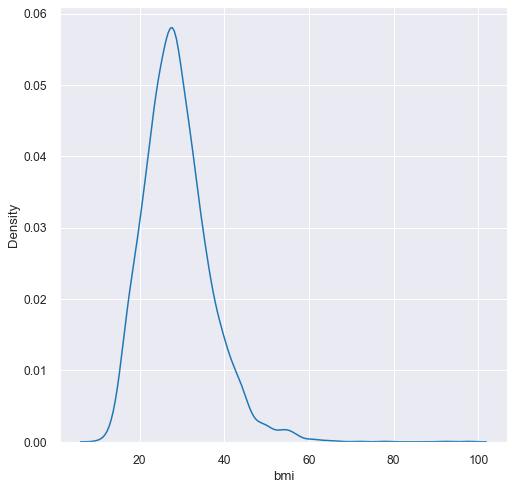

In [22]:
# check the distribution of the bmi data,
# using KDE plot instead of histogram to avoid binning bias,
# can be considered normal distribution with some right-skewed distribution
sns.kdeplot(data=df, x='bmi')
plt.show()

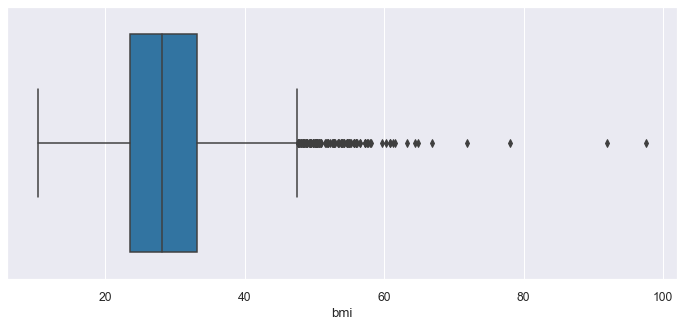

In [23]:
# It can be seen that indeed the distribution is very skewed to the left
# There are many outliers at the right
fig = plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x="bmi")
plt.show()

In [24]:
def nan_imputer(df, variable, median):
    assert type(variable) == str
    df[variable + '_median'] = df[variable].fillna(median)
    df[variable + '_random'] = df[variable]
    
    random_samples = df.dropna().sample(df[variable].isna().sum(), random_state=42)
    random_samples.index = df[df[variable].isna()].index
    # merge nan values by index
    df.loc[df[variable].isna(), variable + '_random'] = random_samples

In [25]:
nan_imputer(df, 'bmi', df.bmi.median())
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_median,bmi_random
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,36.6,36.6
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,28.1,32.3
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,32.5,32.5
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,34.4,34.4
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,24.0,24.0


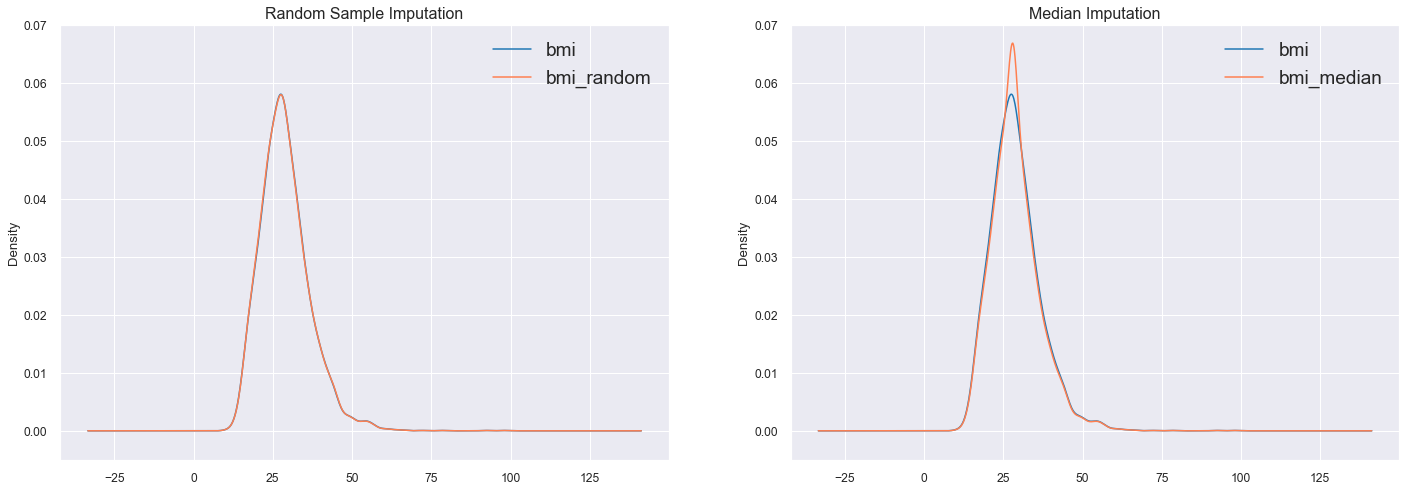

In [26]:
# Comparing random sample imputation with median imputation
fig = plt.figure(figsize=(24,8))
# fig, ax = plt.subplots(figsize=(12,8))
ax = fig.add_subplot(121, ylim=[-0.005, 0.07])
df['bmi'].plot(kind='kde', ax=ax)
df.bmi_random.plot(kind='kde', ax=ax, color='coral')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best', fontsize='x-large')
ax.set_title('Random Sample Imputation', fontdict={'fontsize': 16})
ax.set_title_fontsize = 16

ax = fig.add_subplot(122, ylim=[-0.005, 0.07])
df['bmi'].plot(kind='kde', ax=ax)
df.bmi_median.plot(kind='kde', ax=ax, color='coral')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best', fontsize='x-large')
ax.set_title('Median Imputation', fontdict={'fontsize': 16})

plt.show()

- The result of Median Imputation is acceptable and generally better than randomly sampling, because randomness is usually unwanted.

In [27]:
# Therefore, using median instead of mean to fill the missing values for the bmi
bmi_median = df['bmi'].median()
df['bmi'].fillna(bmi_median, inplace=True)
assert df['bmi'].isna().sum() == 0

In [28]:
df.drop(columns=['bmi_median', 'bmi_random'], inplace=True)

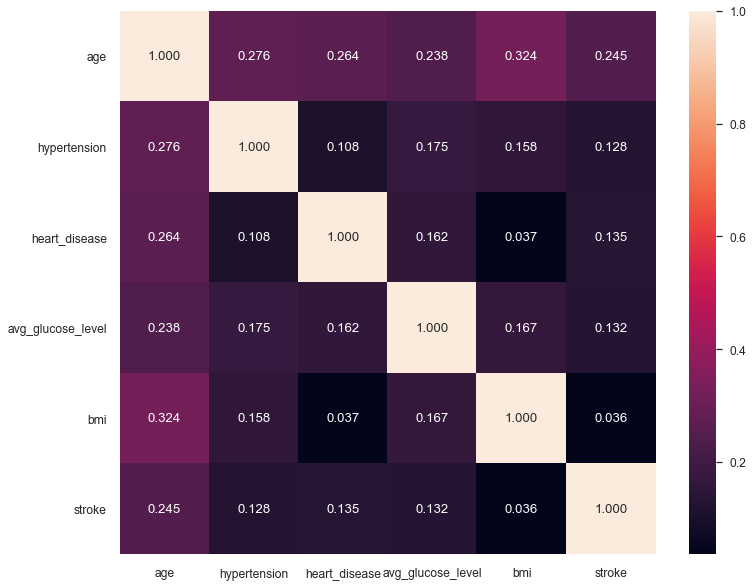

In [29]:
# A general view of the correlation matrix
plt.figure(figsize=(12, 10))
g = sns.heatmap(df.corr(), annot=True, fmt=".3f")
plt.show()

- It can be seen that the features have low correlation with each other. Therefore, there is no multicollinearity problem too.

# Dividing the categorical and numerical columns

In [30]:
cats = list(df.select_dtypes(include=['object', 'category']).columns)
nums = list(df.select_dtypes(exclude=['object', 'category']).columns)
print(f'Categorical variables:  {cats}')
print(f'Numerical variables:  {nums}')

Categorical variables:  ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
Numerical variables:  ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


In [31]:
# Check for the unique values in each column
pd.DataFrame([df.nunique(), df.dtypes], index=['nunique', 'dtype'])

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
nunique,2,104,2,2,2,5,2,3978,418,4,2
dtype,object,float64,int64,int64,object,object,object,float64,float64,object,int64


- All 'object' dtypes can be converted into 'categorical' dtypes as there are only very few categories, this is for memory saving.
- hypertension, heart_disease and stroke can also be converted into 'categorical' dtypes as there are only few categories too.

In [32]:
# Convert a few of the numerical variables to categorical variables
vars_to_convert = ['hypertension', 'heart_disease', 'stroke']
cats.extend(vars_to_convert)
for i in (vars_to_convert):
    nums.remove(i)

In [33]:
# Converting all the categorical variables to 'category' dtypes
df = df.astype({i: 'category' for i in cats})

In [34]:
# It's a good practice to group all variables together having same type
df = pd.concat((df[cats], df[nums]), axis=1)
df.head()

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease,stroke,age,avg_glucose_level,bmi
0,Male,Yes,Private,Urban,formerly smoked,0,1,1,67.0,228.69,36.6
1,Female,Yes,Self-employed,Rural,never smoked,0,0,1,61.0,202.21,28.1
2,Male,Yes,Private,Rural,never smoked,0,1,1,80.0,105.92,32.5
3,Female,Yes,Private,Urban,smokes,0,0,1,49.0,171.23,34.4
4,Female,Yes,Self-employed,Rural,never smoked,1,0,1,79.0,174.12,24.0


In [35]:
# df.to_csv('stroke_cleaned.csv', index=False)

# Analyzing Categorical Features

In [36]:
df = pd.read_csv("stroke_cleaned.csv")

In [37]:
print(f'Categorical variables: {cats}')

Categorical variables: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease', 'stroke']


In [38]:
df_cats = df[cats]
df_cats.head()

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease,stroke
0,Male,Yes,Private,Urban,formerly smoked,0,1,1
1,Female,Yes,Self-employed,Rural,never smoked,0,0,1
2,Male,Yes,Private,Rural,never smoked,0,1,1
3,Female,Yes,Private,Urban,smokes,0,0,1
4,Female,Yes,Self-employed,Rural,never smoked,1,0,1


In [39]:
# Checking the unique values in the cat variables
for cat in (df_cats.columns):
    print(f'Categories in {cat}: {df_cats[cat].unique()}')

Categories in gender: ['Male' 'Female']
Categories in ever_married: ['Yes' 'No']
Categories in work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Categories in Residence_type: ['Urban' 'Rural']
Categories in smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Categories in hypertension: [0 1]
Categories in heart_disease: [1 0]
Categories in stroke: [1 0]


Next, trying to create a new BMI_range category based on the BMI values, <br>
where the categories are encoded as:
- 0 : If your BMI is less than 18.5, it falls within the underweight range.
- 1 : If your BMI is 18.5 to <25, it falls within the normal.
- 2 : If your BMI is 25.0 to <30, it falls within the overweight range.
- 3 : If your BMI is 30.0 or higher, it falls within the obesity range.
- 4 : If BMI is 40 or higher, it is considered to be "extreme" or severe obesity.

In [40]:
# Checking the top 100 highest BMI values
print(sorted(df['bmi'], reverse=True)[:100])

[97.6, 92.0, 78.0, 71.9, 66.8, 64.8, 64.4, 63.3, 61.6, 61.2, 60.9, 60.9, 60.2, 59.7, 58.1, 57.9, 57.7, 57.5, 57.3, 57.2, 57.2, 56.6, 56.6, 56.1, 56.0, 55.9, 55.9, 55.7, 55.7, 55.7, 55.7, 55.2, 55.1, 55.0, 55.0, 54.8, 54.7, 54.7, 54.7, 54.6, 54.6, 54.3, 54.2, 54.1, 54.0, 53.9, 53.8, 53.8, 53.5, 53.4, 53.4, 52.9, 52.8, 52.8, 52.8, 52.7, 52.7, 52.5, 52.3, 51.9, 51.9, 51.8, 51.7, 51.5, 51.0, 50.9, 50.8, 50.6, 50.6, 50.5, 50.4, 50.3, 50.3, 50.2, 50.2, 50.2, 50.2, 50.1, 50.1, 49.9, 49.8, 49.8, 49.8, 49.5, 49.5, 49.4, 49.3, 49.3, 49.3, 49.2, 48.9, 48.9, 48.9, 48.8, 48.8, 48.7, 48.5, 48.5, 48.4, 48.3]


In [41]:
# Encoding the ordinal variable BMI_range from underweight to severe obesity
def create_bmi_range(bmi):
    if bmi < 18.5:
        return 0  # underweight
    elif bmi < 25.0:
        return 1  # normal
    elif bmi < 30.0:
        return 2  # overweight
    elif bmi < 40.0:
        return 3  # obesity
    else:
        return 4  # extreme obesity

In [42]:
# df_cats.drop(columns='bmi_range', inplace=True)
# df_cats.head()

In [43]:
df_cats['bmi_range'] = df['bmi'].apply(create_bmi_range)
# df_cats.loc[:, 'bmi_range'] = df.loc[:, 'bmi_random'].apply(create_bmi_range)
# df_cats.loc[:, 'bmi_range'] = df.loc[:, 'bmi_range']

<ipython-input-43-6675e7d50108>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cats['bmi_range'] = df['bmi'].apply(create_bmi_range)


In [44]:
# Adding the category into cat variables
cats.append('bmi_range')
print(f'Categorical variables:  {cats}')

Categorical variables:  ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease', 'stroke', 'bmi_range']


In [45]:
cats = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease', 'stroke', 'bmi_range']

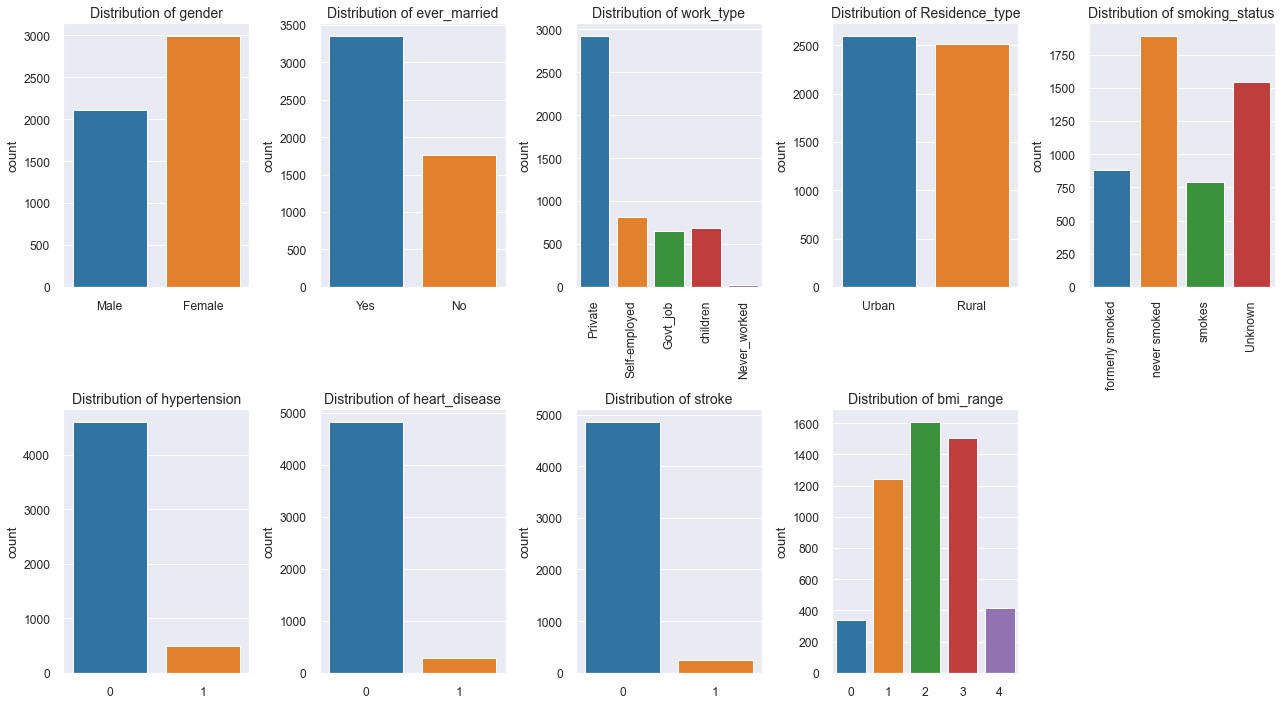

In [46]:
# Ideally, all cat variables should have a uniform distribution
# Which is not in most of the variables here

fig = plt.figure(figsize=(18, 10))

for i, cat in enumerate(df_cats.columns):
    ax = plt.subplot(2, 5, i+1)
    sns.countplot(data=df_cats, x=cat)
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {cat}', size=14)
    if cat in ('work_type', 'smoking_status'):
        # ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        plt.xticks(rotation=90)
    plt.tight_layout()
        
plt.show()

- This shows a very imbalanced dataset especially in terms of the distribution of hypertension, heart_disease, and stroke.

In [47]:
# calculate proportion of dominant classes in each category
num_rows = df_cats.shape[0]
for i, cat in enumerate(df_cats.columns):
    val_counts = df_cats[cat].value_counts()
    dominant_frac = val_counts.iloc[0] / num_rows
    print(f'`{val_counts.index[0]}` alone contributes to {round(dominant_frac * 100, 2)}% of {cat}')

`Female` alone contributes to 58.6% of gender
`Yes` alone contributes to 65.63% of ever_married
`Private` alone contributes to 57.23% of work_type
`Urban` alone contributes to 50.81% of Residence_type
`never smoked` alone contributes to 37.03% of smoking_status
`0` alone contributes to 90.25% of hypertension
`0` alone contributes to 94.6% of heart_disease
`0` alone contributes to 95.13% of stroke
`2` alone contributes to 31.51% of bmi_range


In [48]:
df_cats['work_type'].value_counts(normalize=True)

Private          0.572323
Self-employed    0.160305
children         0.134469
Govt_job         0.128597
Never_worked     0.004306
Name: work_type, dtype: float64

Insights:
- The distribution of `Residence_type` is very good and balanced, as both of the 2 categories (`Urban` & `Rural`) consists of around 50%.
- `gender` and `ever_married` have similar slightly imbalanced distribution, where 1 out of 2 categories consists of around 60% of the data.
- Other variables have very imbalanced distribution, especially `hypertension`, `heart_disease`, and `stroke`, which are highly imbalanced, each of them has a negative (labeled as '0') category of above 90% contribution.
- `work_type` has a `Private` category, which alone already takes up 57.23% out of the 5 categories (ideally should be 20% each). <br> It also has a `Never_worked` category that only accounts for 0.4% of the data (only 22 records), this may be removed later if necessary.
- `smoking_status` is also imbalanced, `never smoked` alone already takes up 37.03% of the data out of 4 categories (ideally 25% each). <br> 
There is an 'Unknown' category which takes up 30.22% of the data. <br>
The `formerly smoked` and `smokes` categories take up 17.3% and 15.44% of data respectively, which sum up to 32.74%, which is about the same percentage as `never smoked` (37.03%). <br> 
Combining these two categories together later might be helpful for a more uniform distribution as smoking could have already taken its toll whether or not the person has quit smoking or not.
- `bmi_range` has a somehow `normal-like` distribution, which is also `not uniform`, with most of the data (31.51%) coming from category `2`, i.e. `overweight` weight. <br>
If categories `3` and `4` were combined together as a standalone `obesity` category, this `obesity` category would have been the dominant category here. <br>
Category `0` (`underweight`) consists of a very low number of data here at only 6.6%, while Category `1` (`normal` weight) has 24.31%.

- Since almost every distribution of these categorical variables is very uneven, the analysis of the relationships between them would not be so insightful, <br>
as most of them would surely be biased towards the dominant categories that have very high frequencies. <br>
- It can be seen in the figures below comparing different categorical variables among `genders`, `smoking_status`, `health conditions` and whether they have `stroke` or not.

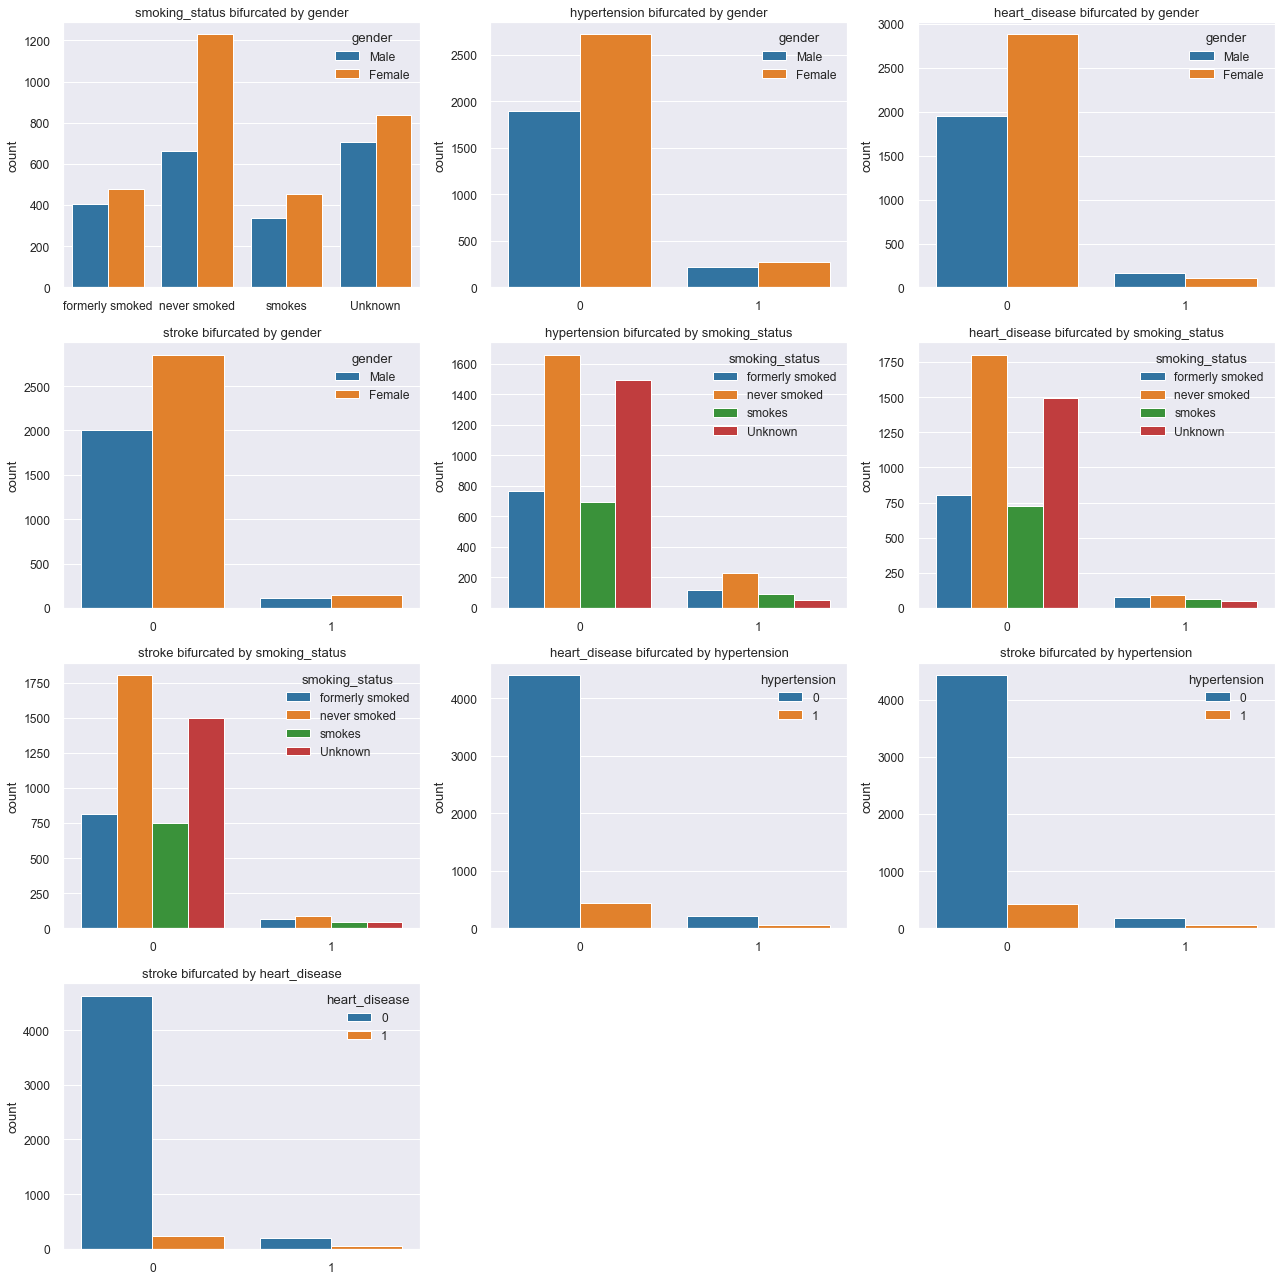

In [49]:
import itertools
combos = itertools.combinations(['gender', 'smoking_status', 'hypertension', 'heart_disease', 'stroke'], 2)

fig = plt.figure(1, (18, 18))

i = 0
for pair in combos:
    i+=1
    ax = plt.subplot(4,3,i)
    sns.countplot(x=pair[1], hue=pair[0], data=df_cats)
    ax.set_xlabel(None)
    ax.set_title(f'{pair[1]} bifurcated by {pair[0]}', size=13)
    plt.tight_layout()
plt.show()

- Out of all these, there are some notable ones.
**hypertension/stroke by gender**
- Although it is clear that `Female` is the dominant class here, the number of `Male` having `hypertension`/`stroke` is seemingly quite close to `Female` having `hypertension`/`stroke`. <br>
**heart_disease by gender**
- Although `Female` is the dominant class, more `Male` is suffering from `heart_disease`. <br>
**hypertension/heart_disease/stroke by smoking_status**
- The number of `Unknown` `smoking_status` is very low for those that has `hypertension`/`heart_disease`/`stroke` in comparison to those that does not.
<br> <br>
**Analyzing `bmi_range` with `gender`, bifurcated by `stroke`** :

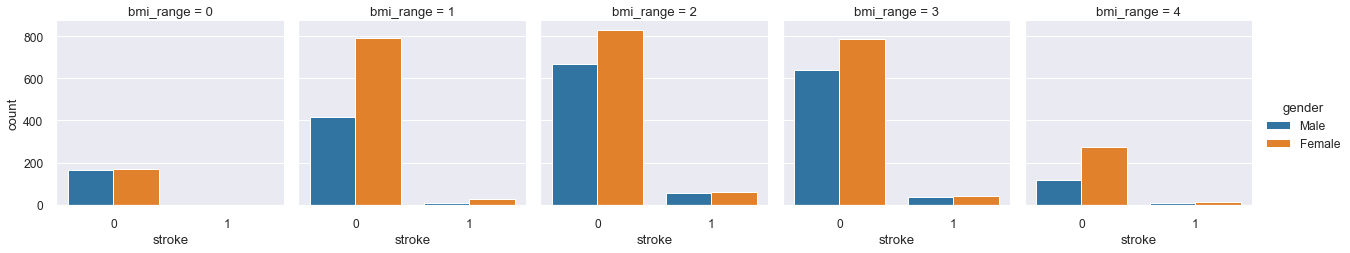

In [100]:
sns.catplot(data=df_cats, x='stroke', hue='gender', col='bmi_range', kind='count', height=3.5)
plt.show()

- At `bmi_range` of category `0` (`underweight`), `Male` and `Female` have very similar distribution.
- Otherwise, they follow the frequency distribution of `bmi_range` shown above, with `Female` being the dominant class compared to `Male`.
<br> <br>
**Analyzing `work_type` with `gender`, bifurcated by `stroke`** :

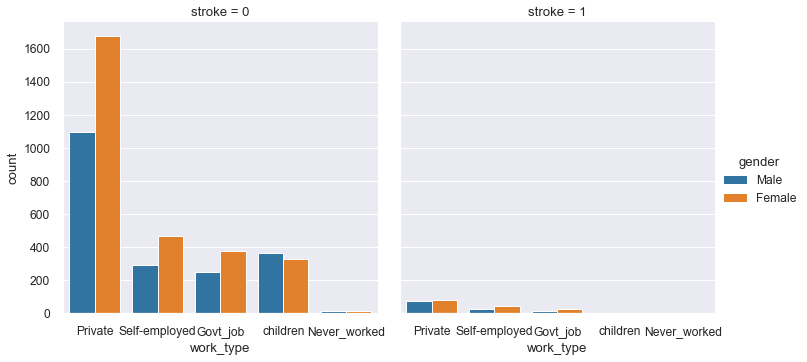

In [51]:
sns.catplot(data=df_cats, x='work_type', hue='gender', col='stroke', kind='count')
plt.show()

- There are more `Male` children that does not suffer from stroke
- However, there is only `Female` instead of `Male` children suffering from stroke
- `Never_worked` category has only very low number of data, so there is nothing notable about it.
- Otherwise, they follow the same distribution of `work_type` shown in figure above.
<br> <br>
**Analyzing `Residence_type` with `gender`, bifurcated by `stroke`** :

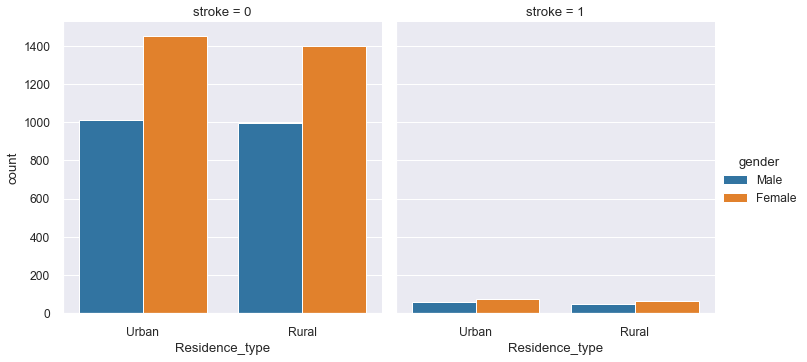

In [52]:
sns.catplot(data=df_cats, x='Residence_type', hue='gender', col='stroke', kind='count')
plt.show()

- `Urban` and `Rural` has very similar distribution originally, here it is still similar in terms of `gender`, in both having or not having `stroke`, <br>
with `Female` having slightly higher number of `stroke` patients, which is similar to the distribution of `gender`.
<br> <br>
**Analyzing `ever_married` with `gender`, bifurcated by `stroke`** :

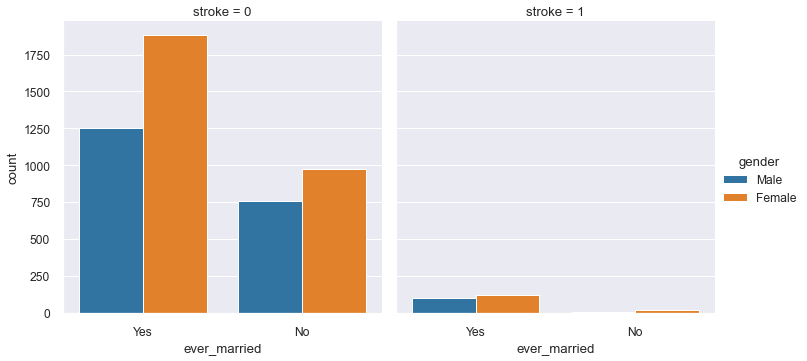

In [53]:
sns.catplot(data=df_cats, x='ever_married', hue='gender', col='stroke', kind='count')
plt.show()

- Similar to `Residence_type`, `not married` vs `married` has very similar distribution, whether they are `Male` or `Female`. <br>
- `gender` is still having the same distribution here, where `Female` is the dominant class.

In [54]:
df = pd.concat([df_cats, df.loc[:, nums]], axis=1)
df.head()

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease,stroke,bmi_range,age,avg_glucose_level,bmi
0,Male,Yes,Private,Urban,formerly smoked,0,1,1,3,67.0,228.69,36.6
1,Female,Yes,Self-employed,Rural,never smoked,0,0,1,2,61.0,202.21,28.1
2,Male,Yes,Private,Rural,never smoked,0,1,1,3,80.0,105.92,32.5
3,Female,Yes,Private,Urban,smokes,0,0,1,3,49.0,171.23,34.4
4,Female,Yes,Self-employed,Rural,never smoked,1,0,1,1,79.0,174.12,24.0


In [55]:
# Save the changes to file
# df.to_csv('stroke_det_cat.csv', index=False)

# Analyzing Numerical Features

## Setup DataFrame

In [56]:
def load_preprocess_df():
    df = pd.read_csv('stroke_det_cat.csv')
    cats = list(df.select_dtypes(include=['object', 'category']).columns)
    nums = list(df.select_dtypes(exclude=['object', 'category']).columns)
    
    features_to_conv = ['bmi_range', 'hypertension', 'heart_disease', 'stroke']
    cats.extend(features_to_conv)
    for feature in features_to_conv:
        if feature in nums:
            nums.remove(feature)
    print(f'Categorical variables:  {cats}')
    print(f'Numerical variables:  {nums}')
    df = df.astype({i: 'category' for i in cats})
    df = pd.concat([df[cats], df[nums]], axis=1)
    return df

In [57]:
df = load_preprocess_df()
df.head()

Categorical variables:  ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'bmi_range', 'hypertension', 'heart_disease', 'stroke']
Numerical variables:  ['age', 'avg_glucose_level', 'bmi']


,gender,ever_married,work_type,Residence_type,smoking_status,bmi_range,hypertension,heart_disease,stroke,age,avg_glucose_level,bmi
0,Male,Yes,Private,Urban,formerly smoked,3,0,1,1,67.0,228.69,36.6
1,Female,Yes,Self-employed,Rural,never smoked,2,0,0,1,61.0,202.21,28.1
2,Male,Yes,Private,Rural,never smoked,3,0,1,1,80.0,105.92,32.5
3,Female,Yes,Private,Urban,smokes,3,0,0,1,49.0,171.23,34.4
4,Female,Yes,Self-employed,Rural,never smoked,1,1,0,1,79.0,174.12,24.0


In [58]:
df.dtypes

gender               category
ever_married         category
work_type            category
Residence_type       category
smoking_status       category
bmi_range            category
hypertension         category
heart_disease        category
stroke               category
age                   float64
avg_glucose_level     float64
bmi                   float64
dtype: object

In [59]:
nums = ['age', 'avg_glucose_level', 'bmi']
print(f'Numerical Features: {nums}')

Numerical Features: ['age', 'avg_glucose_level', 'bmi']


In [60]:
df_nums = df[nums]
df_nums.head()

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,61.0,202.21,28.1
2,80.0,105.92,32.5
3,49.0,171.23,34.4
4,79.0,174.12,24.0


In [61]:
df_nums.describe()

,age,avg_glucose_level,bmi
count,5109.000000,5109.000000,5109.000000
mean,43.229986,106.140399,28.863300
std,22.613575,45.285004,7.699785
min,0.080000,55.120000,10.300000
25%,25.000000,77.240000,23.800000
50%,45.000000,91.880000,28.100000
75%,61.000000,114.090000,32.800000
max,82.000000,271.740000,97.600000


- From this table above, it is already clear that `avg_glucose_level` and `bmi` probably has some large outliers by comparing the `max` values with the percentiles. <br>
This is because the `max` values (271.74 & 97.6) are very far from the 3rd quartile (75th percentile: 114.09 & 32.80) and the median (50th percentile: 91.88 & 28.10)) <br>
This will be much more obvious in the box plots that will be shown later.

## Analyzing distribution

- Ideally should be `normal` distribution for each numerical feature, the plots should look similar to this: ![normal_distribution](normal_distribution.png) <br>
Image source: https://www.kaggle.com/gauravsharma99/eda-on-mpg-data/notebook

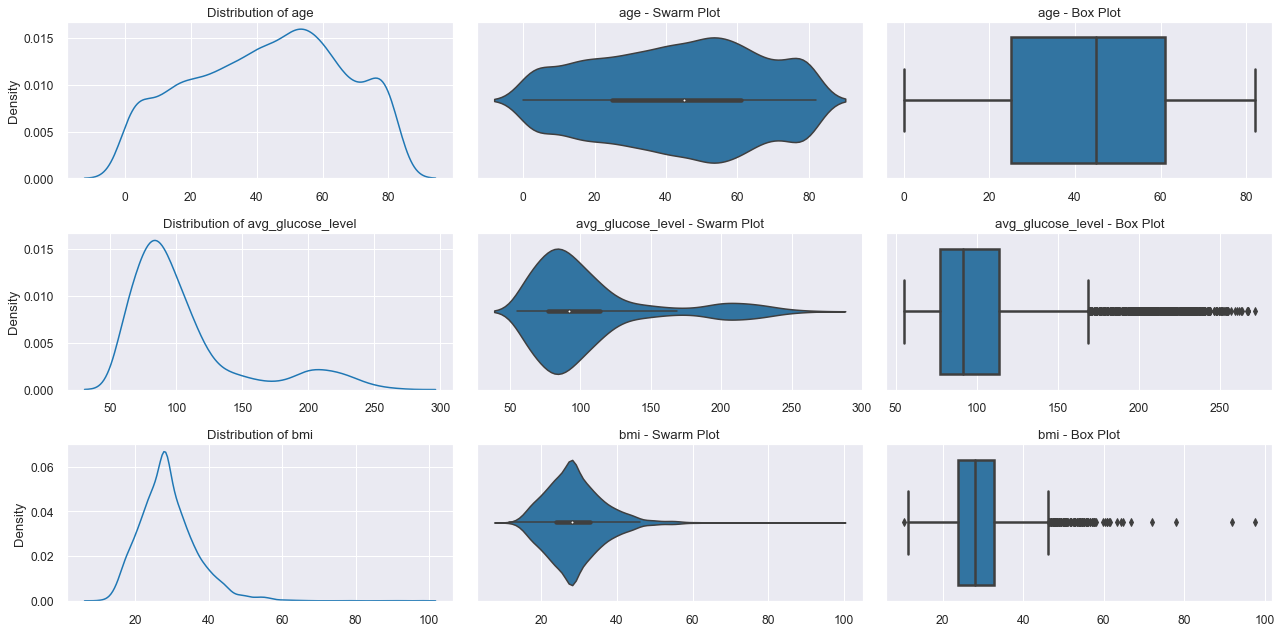

In [62]:
rows = len(nums)
cols = 3

fig = plt.figure(1, (18, rows*3))

i = 0 
for feature in nums:
    
    i += 1
    ax1 = plt.subplot(rows, cols, i)
    sns.kdeplot(data=df_nums, x=feature)
    ax1.set_xlabel(None)
    ax1.set_title(f'Distribution of {feature}')
    plt.tight_layout()

    i += 1
    ax2 = plt.subplot(rows, cols, i)
    sns.violinplot(data=df_nums, x=feature)
    ax2.set_xlabel(None)
    ax2.set_title(f'{feature} - Swarm Plot')
    plt.tight_layout()

    i += 1
    ax3 = plt.subplot(rows, cols, i)
    sns.boxplot(data=df_nums, x=feature, orient='h', linewidth=2.5)
    ax3.set_xlabel(None)
    ax3.set_title(f'{feature} - Box Plot')
    plt.tight_layout()
    
plt.show()

- The distribution of `age` is `normal-like`, which is good. There is no outlier, as you can see in the box plot.
- For `avg_glucose_level` and `bmi`, their distributions are skewed very severely towards the right. <br>
There are many `outliers` at higher values. Therefore, they are far from a `normal` distribution. <br>
If the `outliers` did not exist in these two distributions, they would have become very close to a `normal` distribution.

**Cumulative Distribution Function (CDF) Plots**

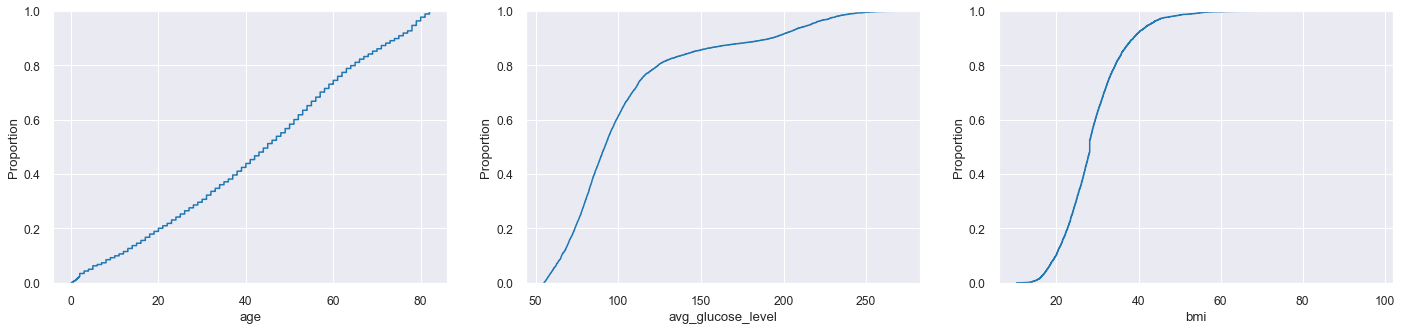

In [63]:
fig = plt.figure(figsize=(24, 5))
for i, feature in enumerate(nums):
    ax = plt.subplot(1, 3, i+1)
    sns.ecdfplot(data=df, x=feature)
# plt.legend(nums, fontsize=12)
plt.show()

- The increase in the proportion of `age` is very uniform across the board as the curve is almost straight.
- While the other two numerical variables have noticeable spikes at certain point, implying that there is a sudden increase in frequencies at certain range of values. <br>
i.e. `avg_glucose_level` increased tremendously at the range of values between `50` to `100`, which takes up a proportion of close to `60%` of the data. <br>
While, `bmi` has a huge amount of data at a range between `20` to `40`, which takes up about `80%` (0.9 - 0.1 proportion) of the data.

In [64]:
def tukey_outliers(x):
    # Tukey outliers are based on the boundaries defined by quantiles and IQR
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    
    iqr = q3 - q1
    
    lower_boundary = q1 - (iqr * 1.5)
    upper_boundary = q3 + (iqr * 1.5)
    
    outliers = x[(x < lower_boundary) | (x > upper_boundary)]
    return outliers

In [65]:
outlier_dict = {}
for num_feature in nums:
    outliers = tukey_outliers(df_nums[num_feature])
    if len(outliers):
        print(f"-> {num_feature} has these tukey outliers,\n{outliers}\n")
        outlier_dict[num_feature] = outliers
    else:
        print(f"-> {num_feature} doesn't have any tukey outliers.\n")
        outlier_dict[num_feature] = None

-> age doesn't have any tukey outliers.

-> avg_glucose_level has these tukey outliers,
0       228.69
1       202.21
3       171.23
4       174.12
5       186.21
         ...  
5060    223.78
5061    211.58
5062    179.38
5063    193.88
5075    174.37
Name: avg_glucose_level, Length: 627, dtype: float64

-> bmi has these tukey outliers,
21      48.9
66      47.5
113     56.6
254     50.1
258     54.6
        ... 
4905    54.1
4951    56.6
5008    49.5
5056    47.6
5102    46.9
Name: bmi, Length: 126, dtype: float64



In [66]:
glucose_outliers = df.loc[outlier_dict['avg_glucose_level'].index]
glucose_outliers.head()

,gender,ever_married,work_type,Residence_type,smoking_status,bmi_range,hypertension,heart_disease,stroke,age,avg_glucose_level,bmi
0,Male,Yes,Private,Urban,formerly smoked,3,0,1,1,67.0,228.69,36.6
1,Female,Yes,Self-employed,Rural,never smoked,2,0,0,1,61.0,202.21,28.1
3,Female,Yes,Private,Urban,smokes,3,0,0,1,49.0,171.23,34.4
4,Female,Yes,Self-employed,Rural,never smoked,1,1,0,1,79.0,174.12,24.0
5,Male,Yes,Private,Urban,formerly smoked,2,0,0,1,81.0,186.21,29.0


In [67]:
glucose_outliers.stroke.value_counts()

0    543
1     84
Name: stroke, dtype: int64

In [68]:
f'avg_glucose_level has {round(len(glucose_outliers) / len(df) * 100, 2)}% of outliers'

'avg_glucose_level has 12.27% of outliers'

In [69]:
bmi_outliers = df.loc[outlier_dict['bmi'].index]
bmi_outliers.head()

,gender,ever_married,work_type,Residence_type,smoking_status,bmi_range,hypertension,heart_disease,stroke,age,avg_glucose_level,bmi
21,Female,Yes,Self-employed,Urban,never smoked,4,1,0,1,52.0,233.29,48.9
66,Female,Yes,Private,Urban,never smoked,4,0,0,1,70.0,221.58,47.5
113,Female,Yes,Private,Rural,never smoked,4,0,0,1,45.0,224.10,56.6
254,Female,Yes,Private,Urban,Unknown,4,0,0,0,47.0,210.95,50.1
258,Female,Yes,Self-employed,Urban,never smoked,4,1,0,0,74.0,205.84,54.6


In [70]:
bmi_outliers.stroke.value_counts()

0    123
1      3
Name: stroke, dtype: int64

- The proportion of `bmi` outliers that has `stroke` is very low. It might be better to remove this outliers later to avoid cluttering the data.

In [71]:
f'bmi has {round(len(bmi_outliers) / len(df) * 100, 2)}% of outliers'

'bmi has 2.47% of outliers'

- `avg_glucose_level` has a huge amount of outliers at the right, accounting for 12.27% of the entire data.
- While `bmi` has some outliers too, although they only account for 2.47% of the entire data.
- Therefore, it is still decided to scale the data properly later to mitigate this problem.

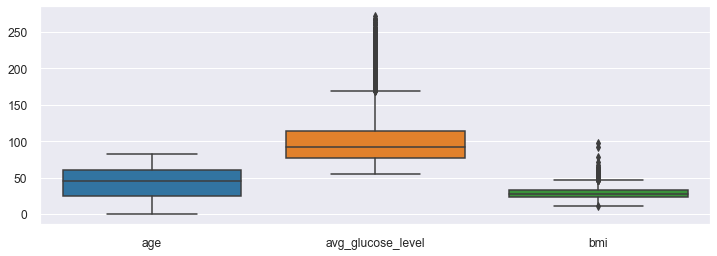

In [72]:
# The figure further indicates that the data should be scaled
fig = plt.figure(figsize=(12, 4))
ax = plt.subplot(1, 1, 1)
sns.boxplot(x="variable", y="value", data=pd.melt(df_nums))
plt.xlabel(None)
plt.ylabel(None)
plt.show()

## Analyzing relationship between different numerical features

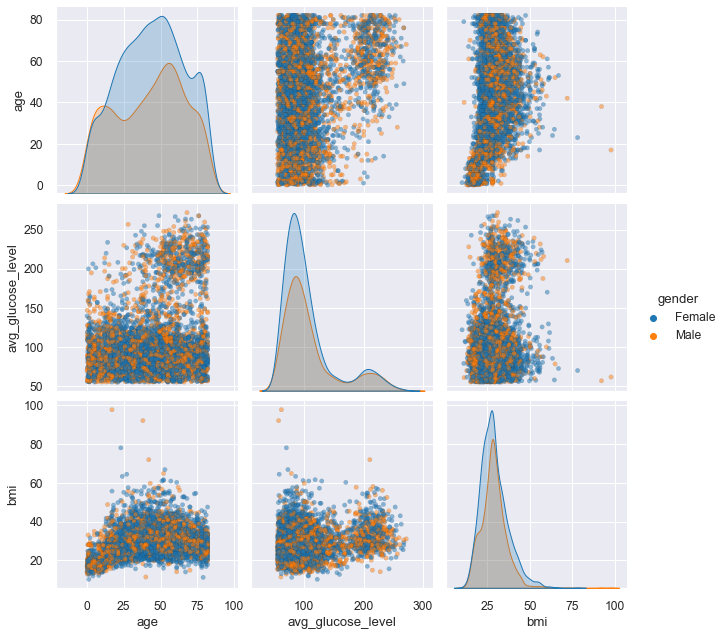

In [73]:
sns.pairplot(data=df, vars=nums, diag_kind='kde', hue='gender',
            plot_kws=dict(s=20, edgecolor="k", linewidth=0.1, alpha=0.5), diag_kws=dict(shade=True), height=3)
plt.show()

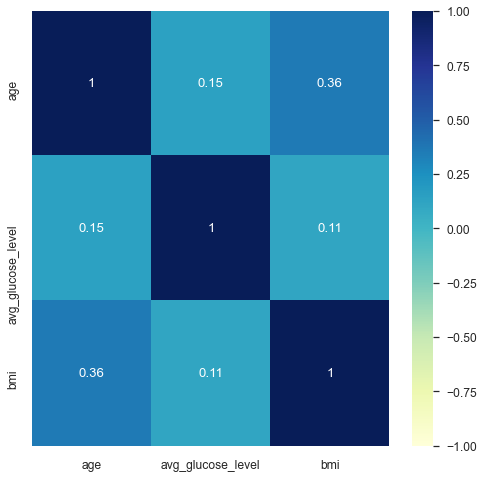

In [116]:
sns.heatmap(df_nums.corr(method='spearman'), annot=True, vmin=-1, vmax=1, center=0, cmap='YlGnBu')
plt.show()

- All the correlations are positive, means as one variable increases, another variable also increases.
- But the correlations have very low value of below `0.40`. 
- Except `bmi` VS `age` has noticeably higher correlation, This correlation can be seen in the `pairplot` above too.
- In the `pairplot`, we also can see that all of the numerical variables have their data saturated at below the centerline of the range of values, <br>
with some outliers at the higher values. <br>

**In conclusion, only `bmi` is more positively correlated with `age`.**

# Analyzing relationship between numerical and categorical features

## Bifurcation of these relationships with different categories

In [75]:
print(cats)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease', 'stroke', 'bmi_range']


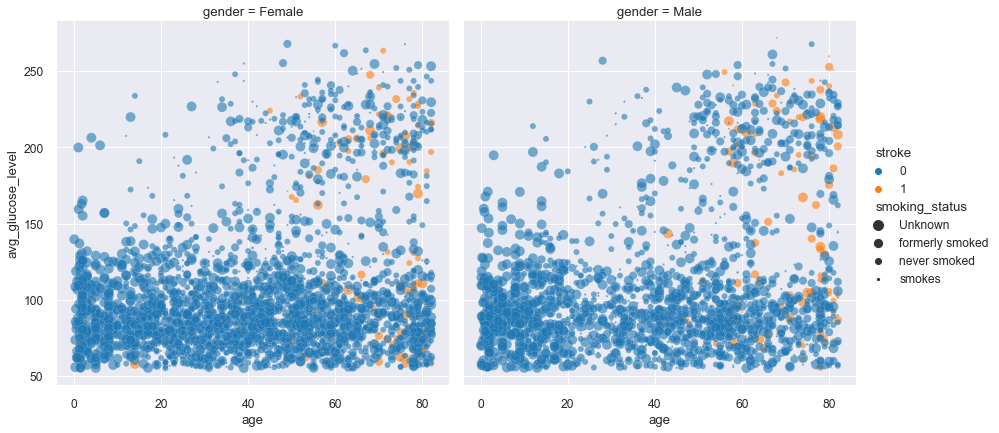

In [76]:
sns.relplot(x='age', y='avg_glucose_level', hue='stroke', #style='mpg_level',
            size='smoking_status', col='gender', data=df, kind='scatter', sizes=(5, 100), alpha=0.6, height=6)
plt.show()

- `stroke` seems to only found in higher `age`
- There are a lot of the `Unknown` `smoking_status` coming from the kids (`age` below 20)

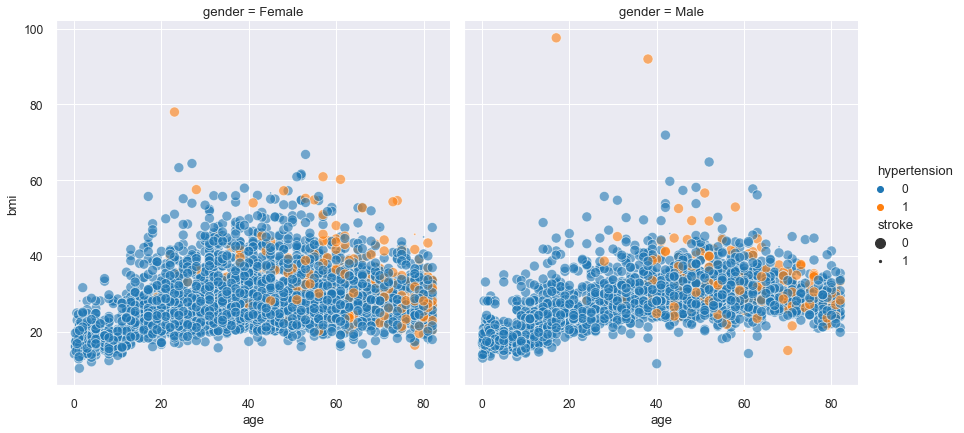

In [77]:
sns.relplot(x='age', y='bmi', hue='hypertension', #style='mpg_level',
            size='stroke', col='gender', data=df, kind='scatter', sizes=(5, 100), alpha=0.6, height=6)
plt.show()

- `hypertension` generally comes from `age` above 40, and still conforms to the general distribution of `bmi` beyond that.

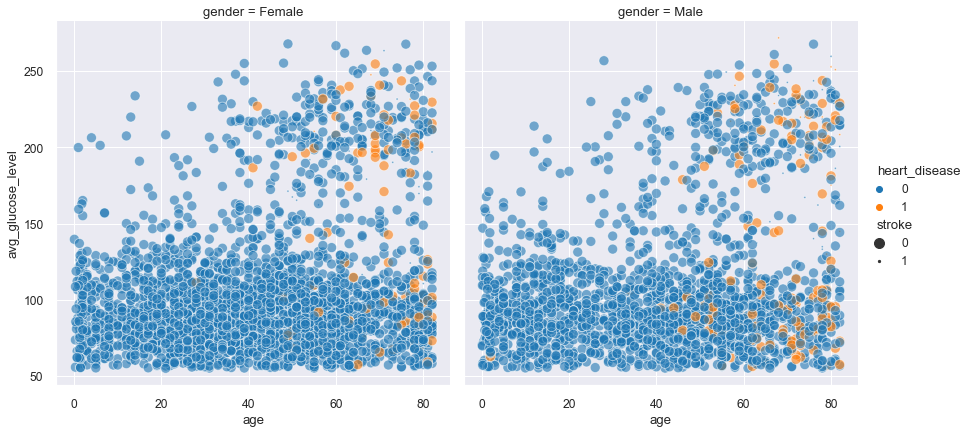

In [78]:
sns.relplot(x='age', y='avg_glucose_level', hue='heart_disease', #style='mpg_level',
            size='stroke', col='gender', data=df, kind='scatter', sizes=(5, 100), alpha=0.6, height=6)
plt.show()

- `heart_disease` is similar to `hypertension`, where most of them come from higher `age`, <br>
but it seems to vary a lot compared to `avg_glucose_level`, which has higher density at lower values.

## Comparing distribution of numerical features with each categorical feature

In [79]:
print(cats)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease', 'stroke', 'bmi_range']


Distribution of numerical features with respect to stroke


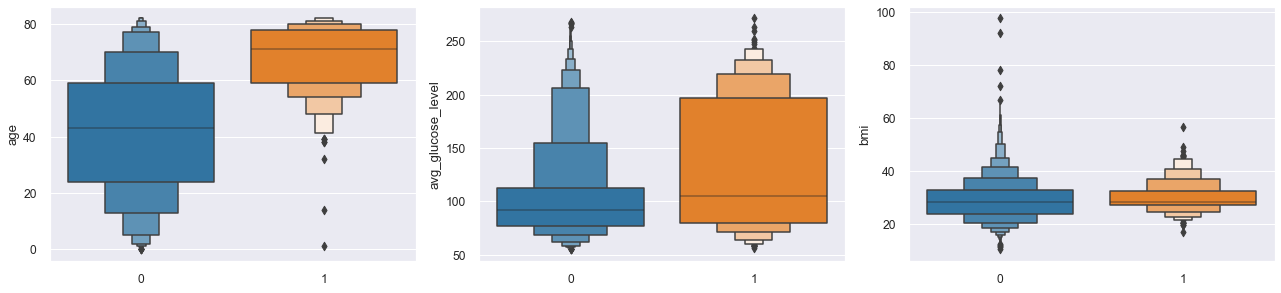

In [80]:
print('Distribution of numerical features with respect to stroke')

fig = plt.figure(1, (18, 8))

for idx,col in enumerate(nums):
    ax = plt.subplot(2, 3, idx+1)
    sns.boxenplot(x='stroke', y=col, data=df)
    ax.set_xlabel(None)
    plt.tight_layout()
plt.show()

- For `age`, the distribution of people with `stroke` is mostly concentrated at higher age of above **60** years old.
- For `avg_glucose_level`, the people with `stroke` generally has higher glucose levels, and a more even distribution at the range between **80** to **200** units
- For `bmi`, most of the values are concentrated at lower values below 35 units, with a lot of large outliers for those that do not have `stroke`

Distribution of numerical features with respect to gender


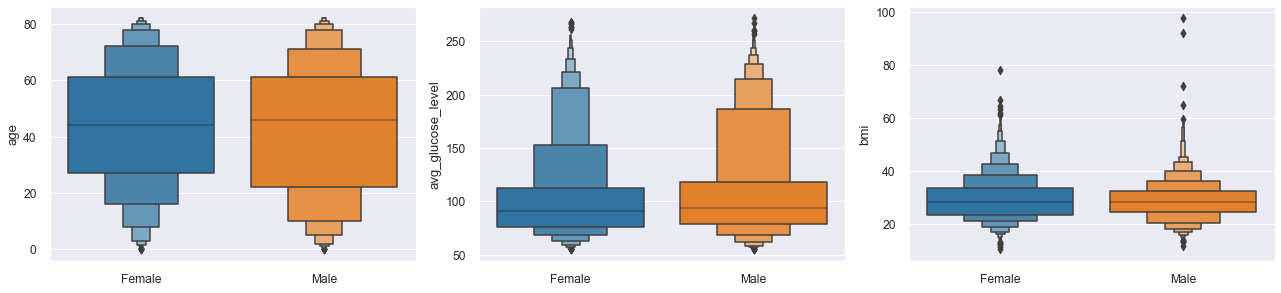

In [81]:
print('Distribution of numerical features with respect to gender')

fig = plt.figure(1, (18, 8))

for idx,col in enumerate(nums):
    ax = plt.subplot(2, 3, idx+1)
    sns.boxenplot(x='gender', y=col, data=df)
    ax.set_xlabel(None)
    plt.tight_layout()
plt.show()

- All the numerical feature distributions for both `Male` and `Female` are very similar, with `Male` having noticeably larger outlier values at `bmi`.

Distribution of numerical features with respect to bmi_range


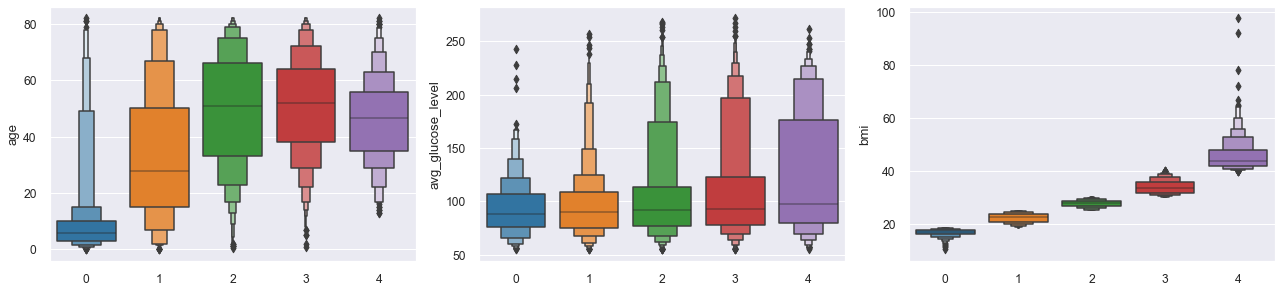

In [82]:
print('Distribution of numerical features with respect to bmi_range')

fig = plt.figure(1, (18, 8))

for idx,col in enumerate(nums):
    ax = plt.subplot(2, 3, idx+1)
    sns.boxenplot(x='bmi_range', y=col, data=df)
    ax.set_xlabel(None)
    plt.tight_layout()
plt.show()

- When looking at `bmi_range` from `underweight` (`0`) until `extreme obesity` (`4`), generally `older` people have worse `BMI` levels.
- The `avg_glucose_levels` are generally the same but with increasingly higher upper boundary from categories of `0` until `3`, <br> 
except `4` has more people with higher `avg_glucose_levels` which are within the IQR.
- The `bmi` plot looks like this because each of the `bmi_range` category was defined in such range of values.

Distribution of numerical features with respect to smoking_status


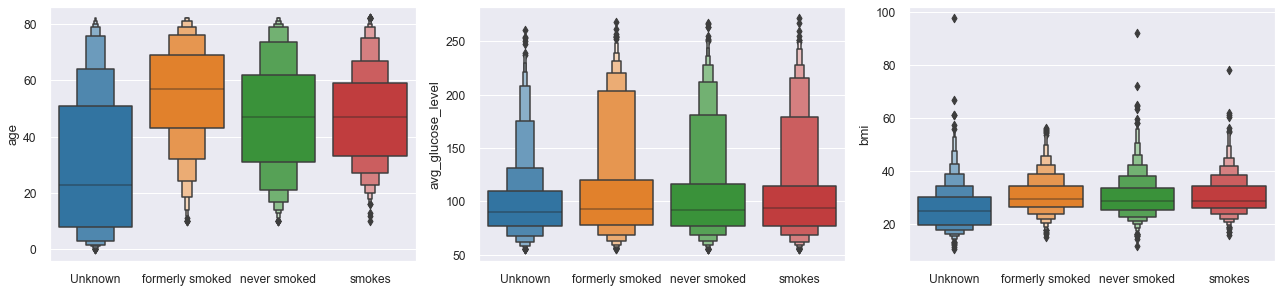

In [83]:
print('Distribution of numerical features with respect to smoking_status')

fig = plt.figure(1, (18, 8))

for idx,col in enumerate(nums):
    ax = plt.subplot(2, 3, idx+1)
    sns.boxenplot(x='smoking_status', y=col, data=df)
    ax.set_xlabel(None)
    plt.tight_layout()
plt.show()

- Generally, `smokers` are found in `older` people above `30` years old, but there are more `older` people who have `quit smoking`
- For `avg_glucose_level`, `smoking_status` categories have very similar distribution, implying that they could be independent to each other in this case
- For `bmi`, their distributions are very similar to each other except for `never smoked`, which have more outliers at larger values.
- `Unknown` status is mostly found in all `age` values, but have similar distribution with other categories in terms of `avg_glucose_level` & `bmi`

Distribution of numerical features with respect to hypertension


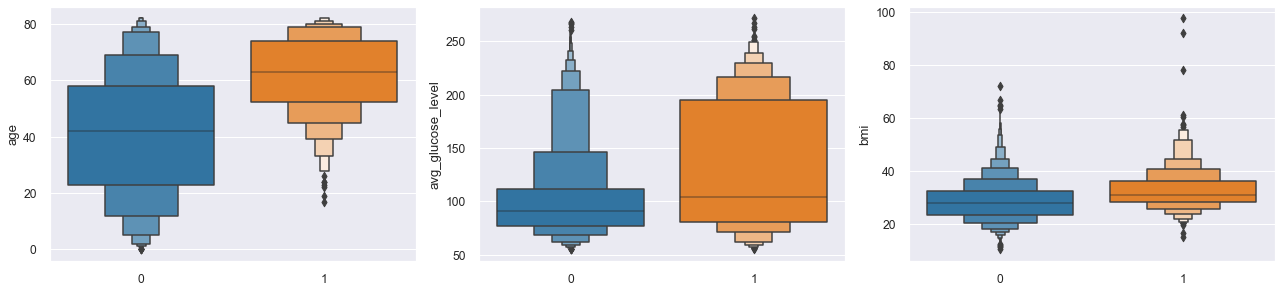

In [84]:
print('Distribution of numerical features with respect to hypertension')

fig = plt.figure(1, (18, 8))

for idx,col in enumerate(nums):
    ax = plt.subplot(2, 3, idx+1)
    sns.boxenplot(x='hypertension', y=col, data=df)
    ax.set_xlabel(None)
    plt.tight_layout()
plt.show()

- `hypertension` is mostly found in `older` people compared to `younger` people.
- `avg_glucose_level` is also the same, higher `glucose levels` have much larger number of `hypertension` patients
- But `bmi` values does not seem to relate so much with `hypertension`, `hypertension` patients have only slightly higher `bmi` values.

Distribution of numerical features with respect to heart_disease


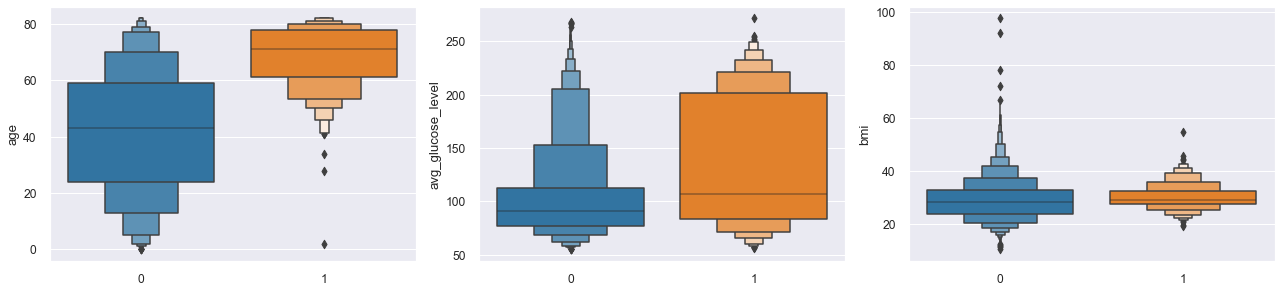

In [85]:
print('Distribution of numerical features with respect to heart_disease')

fig = plt.figure(1, (18, 8))

for idx,col in enumerate(nums):
    ax = plt.subplot(2, 3, idx+1)
    sns.boxenplot(x='heart_disease', y=col, data=df)
    ax.set_xlabel(None)
    plt.tight_layout()
plt.show()

- The overall distribution for `heart_disease` is very similar to that of `hypertension`
- This shows that most likely `age` and diseases (`heart_disease` & `hypertension`) are really related to each other, which is generally the case with human's health.
- Higher `avg_glucose_levels` is also more likely to lead to `heart_disease` and `hypertension`

Distribution of numerical features with respect to ever_married


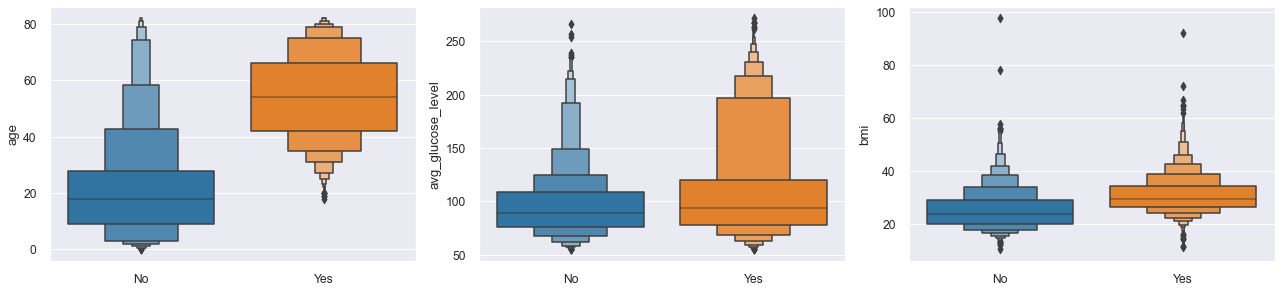

In [86]:
print('Distribution of numerical features with respect to ever_married')

fig = plt.figure(1, (18, 8))

for idx,col in enumerate(nums):
    ax = plt.subplot(2, 3, idx+1)
    sns.boxenplot(x='ever_married', y=col, data=df)
    ax.set_xlabel(None)
    plt.tight_layout()
plt.show()

- There is nothing much to derive out of this, but it makes sense that most of the `married` status come from the `older` people
- And `married` people does seem to have slightly higher `bmi` than `not_married`

Distribution of numerical features with respect to work_type


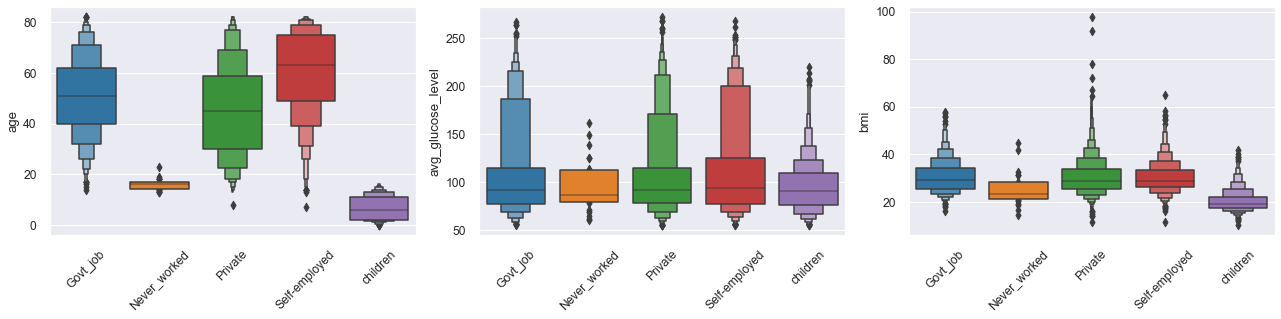

In [87]:
print('Distribution of numerical features with respect to work_type')

fig = plt.figure(1, (18, 8))

for idx, col in enumerate(nums):
    ax = plt.subplot(2, 3, idx+1)
    sns.boxenplot(x='work_type', y=col, data=df)
    ax.set_xlabel(None)
    plt.tight_layout()
    plt.xticks(rotation=45)
    
    
plt.show()

Distribution of numerical features with respect to Residence_type


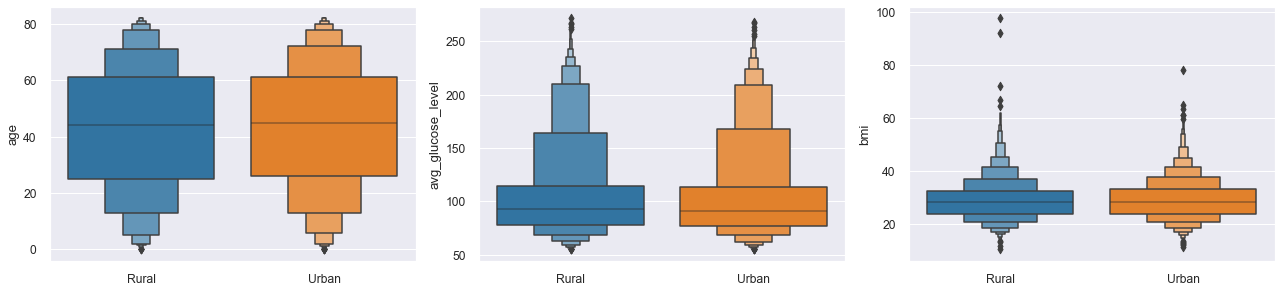

In [88]:
print('Distribution of numerical features with respect to Residence_type')

fig = plt.figure(1, (18, 8))

for idx,col in enumerate(nums):
    ax = plt.subplot(2, 3, idx+1)
    sns.boxenplot(x='Residence_type', y=col, data=df)
    ax.set_xlabel(None)
    plt.tight_layout()
plt.show()

- The distribution of `work_type` and `Residence_type` does not have any useful insights to derive from.